# Gammafest with TensorFlow

In [55]:
# General
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pre-Processing
from sklearn.impute import KNNImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Modeling
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split

import tensorflow as tf
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report


In [56]:
# Random Seed
random_seed = 42 # set random seed for reproducibility
tf.random.set_seed(random_seed) # set random seed for TensorFlow
np.random.seed(random_seed) # set random seed for NumPy

## Data

### Load Data

In [57]:
df_train = pd.read_csv('/home/danielbudi/Collage/comp-gammafest/comp-model/comp-dataset/train.csv')
df_train

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,Layak Minum
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,Layak Minum
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,Layak Minum
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,Layak Minum
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,Layak Minum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,47958,94,1,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,NaN,0.0,0.0,0.0,1,21.0,9.0,Layak Minum
35969,47959,94,1,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,12.0,Layak Minum
35970,47961,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1,11.0,48.0,Layak Minum
35971,47962,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,39.0,Layak Minum


In [58]:
df_test = pd.read_csv('/home/danielbudi/Collage/comp-gammafest/comp-model/comp-dataset/test.csv')
df_test

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
0,26718,35,2,17,1,0,1,0,1,1,...,0,0,1,1,1,1,1,3,21,52
1,26802,35,1,12,1,1,1,1,0,1,...,0,0,1,1,0,0,1,2,11,18
2,41302,74,2,12,1,0,1,1,1,1,...,0,0,1,0,0,1,4,5,11,78
3,38698,72,1,12,1,1,0,0,0,0,...,0,0,1,0,1,0,0,1,11,20
4,44257,76,2,12,1,0,1,0,0,1,...,0,0,1,1,1,1,1,3,11,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,36943,65,2,12,1,0,1,0,0,1,...,0,0,1,0,0,0,0,4,11,70
11986,33415,61,2,12,1,0,1,1,0,1,...,0,1,1,1,1,0,0,4,11,120
11987,41998,74,1,12,1,1,1,1,0,1,...,0,0,1,1,0,0,1,2,11,72
11988,41567,74,2,31,0,0,0,0,0,1,...,0,0,1,0,0,1,1,1,51,9


### EDA

In [59]:
target_column='DC201'

In [60]:
df_train[target_column].replace(to_replace={'Tidak Layak Minum':0, 'Layak Minum':1}, inplace=True)
df_train.drop('id', axis=1, inplace=True)

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DC024   35973 non-null  int64  
 1   DC025   35973 non-null  int64  
 2   DC205   35962 non-null  float64
 3   DC206   35952 non-null  float64
 4   DC207   35929 non-null  float64
 5   DC208   35960 non-null  float64
 6   DC209   35955 non-null  float64
 7   DC210   35932 non-null  float64
 8   DC211   35949 non-null  float64
 9   DC212   35949 non-null  float64
 10  DC213   35896 non-null  float64
 11  DC214   35964 non-null  float64
 12  DC215   35959 non-null  float64
 13  DC216   35934 non-null  float64
 14  DC217   35973 non-null  int64  
 15  DC219   35973 non-null  int64  
 16  DC220   35969 non-null  float64
 17  DC226   35967 non-null  float64
 18  DC230a  35962 non-null  float64
 19  DC230b  32964 non-null  float64
 20  DC232   32949 non-null  float64
 21  DC232b  32949 non-null  float64
 22

In [62]:
df_train = df_train.fillna(40000)
df_train = df_train.astype('int64')
df_train = df_train.replace(to_replace={40000:None})
df_train = df_train.convert_dtypes()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   DC024   35973 non-null  Int64
 1   DC025   35973 non-null  Int64
 2   DC205   35962 non-null  Int64
 3   DC206   35952 non-null  Int64
 4   DC207   35929 non-null  Int64
 5   DC208   35960 non-null  Int64
 6   DC209   35955 non-null  Int64
 7   DC210   35932 non-null  Int64
 8   DC211   35949 non-null  Int64
 9   DC212   35949 non-null  Int64
 10  DC213   35896 non-null  Int64
 11  DC214   35964 non-null  Int64
 12  DC215   35959 non-null  Int64
 13  DC216   35934 non-null  Int64
 14  DC217   35973 non-null  Int64
 15  DC219   35973 non-null  Int64
 16  DC220   35969 non-null  Int64
 17  DC226   35967 non-null  Int64
 18  DC230a  35962 non-null  Int64
 19  DC230b  32964 non-null  Int64
 20  DC232   32949 non-null  Int64
 21  DC232b  32949 non-null  Int64
 22  DC235   25527 non-null  Int64
 23  DC237   359

In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11990 entries, 0 to 11989
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      11990 non-null  int64
 1   DC024   11990 non-null  int64
 2   DC025   11990 non-null  int64
 3   DC205   11990 non-null  int64
 4   DC206   11990 non-null  int64
 5   DC207   11990 non-null  int64
 6   DC208   11990 non-null  int64
 7   DC209   11990 non-null  int64
 8   DC210   11990 non-null  int64
 9   DC211   11990 non-null  int64
 10  DC212   11990 non-null  int64
 11  DC213   11990 non-null  int64
 12  DC214   11990 non-null  int64
 13  DC215   11990 non-null  int64
 14  DC216   11990 non-null  int64
 15  DC217   11990 non-null  int64
 16  DC219   11990 non-null  int64
 17  DC220   11990 non-null  int64
 18  DC226   11990 non-null  int64
 19  DC230a  11990 non-null  int64
 20  DC230b  11990 non-null  int64
 21  DC232   11990 non-null  int64
 22  DC232b  11990 non-null  int64
 23  DC235   119

In [64]:
df_train.isna().sum()

DC024         0
DC025         0
DC205        11
DC206        21
DC207        44
DC208        13
DC209        18
DC210        41
DC211        24
DC212        24
DC213        77
DC214         9
DC215        14
DC216        39
DC217         0
DC219         0
DC220         4
DC226         6
DC230a       11
DC230b     3009
DC232      3024
DC232b     3024
DC235     10446
DC237        21
DC237a       37
DC237b       37
DC237c       37
DC237d       37
DC237e       37
DC237f       37
DC241       612
DC242      5374
DC244         4
DC246         9
DC252        14
DC270a        0
DC109        11
DC142a       52
DC201         3
dtype: int64

### Drop NaN Label

In [65]:
df_train_clean = df_train[df_train['DC201'].notna()]

In [66]:
df_train_clean.isna().sum()

DC024         0
DC025         0
DC205        10
DC206        21
DC207        43
DC208        13
DC209        18
DC210        41
DC211        24
DC212        24
DC213        77
DC214         9
DC215        14
DC216        39
DC217         0
DC219         0
DC220         4
DC226         6
DC230a       11
DC230b     3009
DC232      3024
DC232b     3024
DC235     10444
DC237        19
DC237a       35
DC237b       35
DC237c       35
DC237d       35
DC237e       35
DC237f       35
DC241       612
DC242      5374
DC244         4
DC246         9
DC252        14
DC270a        0
DC109        10
DC142a       52
DC201         0
dtype: int64

### Feature Selection

In [67]:
selected_features = ['DC206', 'DC207', 'DC208', 'DC209', 'DC210', 'DC211', 'DC212', 'DC213', 'DC214', 'DC215', 'DC216', 'DC217', 'DC230b', 'DC232', 'DC237e', 'DC242', 'DC270a', 'DC201']
selected_features_df = df_train_clean[selected_features]
selected_features_df

,DC206,DC207,DC208,DC209,DC210,DC211,DC212,DC213,DC214,DC215,DC216,DC217,DC230b,DC232,DC237e,DC242,DC270a,DC201
0,1,0,1,0,0,0,0,35,36,31,1,1,1,1,0,0,1,1
1,1,0,1,0,0,1,0,35,36,31,2,4,1,1,0,0,2,1
2,1,0,1,1,1,1,0,35,36,31,2,2,1,1,0,0,4,1
3,1,0,0,0,0,1,0,35,36,31,3,4,1,1,0,<NA>,1,1
4,1,0,1,1,0,0,0,35,36,31,2,3,1,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,1,0,0,0,0,0,0,21,24,31,1,1,<NA>,<NA>,0,<NA>,1,1
35969,1,0,1,1,0,0,0,34,32,31,1,1,1,1,0,1,2,1
35970,1,0,1,1,0,1,0,21,24,31,2,4,1,1,0,1,1,1
35971,1,0,1,1,0,1,0,35,32,31,2,4,1,1,0,1,2,1


### Imputation

In [68]:
imputer = KNNImputer(n_neighbors=5)

knn_df = pd.DataFrame(imputer.fit_transform(df_train_clean), columns=df_train_clean.columns)
knn_df_select = pd.DataFrame(imputer.fit_transform(selected_features_df), columns=selected_features_df.columns)

knn_df = knn_df.astype('int64')
knn_df_select = knn_df_select.astype('int64')

### SMOTE

In [69]:
label = np.array(knn_df[target_column]) # value dari label
knn_df = knn_df.drop(target_column, axis=1) # drop target
feature_list = list(knn_df.columns) # list column
feature = np.array(knn_df) # df dalam bentuk numpy array

# label = np.array(knn_df_select[target_column]) # value dari label
# knn_df_select = knn_df_select.drop(target_column, axis=1) # drop target
# feature_list = list(knn_df_select.columns) # list column
# feature = np.array(knn_df_select) # df dalam bentuk numpy array

In [70]:
# counter = Counter(label)
# print(counter)

# oversample = SMOTE()
# feature, label = oversample.fit_resample(feature, label)

# counter = Counter(label)
# print(counter)

### Normalization

In [71]:
# scaler = StandardScaler()
# scaler = MinMaxScaler()
# feature_norm = scaler.fit_transform(feature)

### PCA

In [72]:
# pca = PCA(n_components = 2)
 
# X_train = pca.fit_transform(X_train)
# X_valid = pca.transform(X_valid)
 
# explained_variance = pca.explained_variance_ratio_

### Split Data

In [73]:
X_train, X_valid, y_train, y_valid = train_test_split(feature, label, test_size=0.1, random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split(feature_norm, label, test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

normalize_layer = tf.keras.layers.Normalization()
normalize_layer.adapt(feature)

(32373, 38) (32373,)
(3597, 38) (3597,)


## Modeling

In [74]:
LEARNING_RATE = 1e-5
BATCH_SIZE = 200
EPOCHS = 100

In [75]:
tf.keras.backend.clear_session() # clean session
model = tf.keras.models.Sequential([
    normalize_layer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation ='sigmoid'),
])

model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss=tf.keras.losses.BinaryCrossentropy(),
            #   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 38)               77        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               4992      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                        

In [76]:
history = model.fit(feature,
                    label,
                    epochs=EPOCHS,
                    callbacks=[
                        EarlyStopping(patience=5, restore_best_weights=True),
                        ModelCheckpoint("model/gammafest.h5", save_best_only=True)
                    ],
                    batch_size=BATCH_SIZE,
                    validation_split=0.2
                    )

Epoch 1/100
144/144 [==============================] - 2s 11ms/step - loss: 0.5399 - accuracy: 0.8511 - val_loss: 0.4641 - val_accuracy: 0.8768
Epoch 2/100
144/144 [==============================] - 1s 8ms/step - loss: 0.3931 - accuracy: 0.9067 - val_loss: 0.3967 - val_accuracy: 0.8768
Epoch 3/100
144/144 [==============================] - 1s 8ms/step - loss: 0.3327 - accuracy: 0.9067 - val_loss: 0.3664 - val_accuracy: 0.8768
Epoch 4/100
144/144 [==============================] - 1s 7ms/step - loss: 0.3003 - accuracy: 0.9067 - val_loss: 0.3467 - val_accuracy: 0.8768
Epoch 5/100
144/144 [==============================] - 1s 7ms/step - loss: 0.2778 - accuracy: 0.9067 - val_loss: 0.3326 - val_accuracy: 0.8768
Epoch 6/100
144/144 [==============================] - 1s 7ms/step - loss: 0.2628 - accuracy: 0.9072 - val_loss: 0.3234 - val_accuracy: 0.8768
Epoch 7/100
144/144 [==============================] - 1s 6ms/step - loss: 0.2533 - accuracy: 0.9080 - val_loss: 0.3178 - val_accuracy: 0.876

## Model Evaluation

In [77]:
test_loss, test_acc = model.evaluate(X_valid, y_valid)

print(f'Test Loss is {test_loss}')
print(f'Test Accuracy is {test_acc}')

113/113 [==============================] - 0s 4ms/step - loss: 0.2257 - accuracy: 0.9147
Test Loss is 0.22566258907318115
Test Accuracy is 0.914651095867157


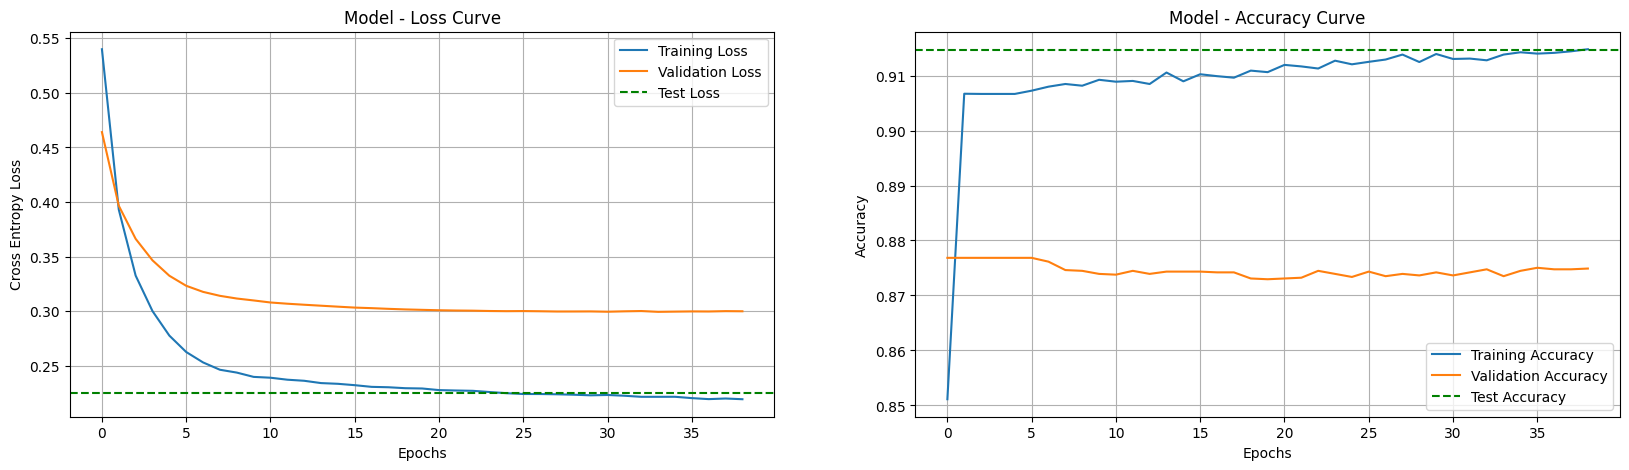

In [78]:
# Collect the history of the training run
history = pd.DataFrame(history.history)

# Create a figure to display the model's performance
plt.figure(figsize=(20, 5))

# Plot the loss curve in the first subplot
plt.subplot(1, 2, 1)
plt.title("Model - Loss Curve")
plt.plot(history['loss'], label="Training Loss")
plt.plot(history['val_loss'], label="Validation Loss")

# Horizontal line to show the testing performance
plt.axhline(y=test_loss, label="Test Loss", linestyle='--', color='green')

# Set the x- and y-labels, and the x- and y-limits
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
# plt.ylim([0, 0.4])

# Show the legend and grid
plt.legend()
plt.grid()

# Plot the accuracy curve in the second subplot
plt.subplot(1, 2, 2)
plt.title("Model - Accuracy Curve")
plt.plot(history['accuracy'], label="Training Accuracy")
plt.plot(history['val_accuracy'], label="Validation Accuracy")

# Horizontal line to show the testing performance
plt.axhline(y=test_acc, label="Test Accuracy", linestyle='--', color='green')

# Set the x- and y-labels, and the x- and y-limits
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
# plt.ylim([0.85, 1])

# Show the legend and grid
plt.legend()
plt.grid()

# Display the plot
plt.show()

In [79]:
# df_test.drop('id', axis=1, inplace=True)
# predict=model.predict(df_test)

# y_pred=[]
# for i in range(len(predict)):
#     y_pred.append(0 if predict[i] < 0.5 else 1)

In [80]:
# cr = classification_report(y_test, y_pred)
# print(cr)

In [81]:
# p_test = model.predict(X_test).argmax(axis=1)
# cm = tf.math.confusion_matrix(y_test, y_pred)

# f, ax = plt.subplots(figsize=(15, 6))
# sns.heatmap(cm, annot=True, cmap='Blues', square=True, linewidths=0.01, linecolor='grey')
# plt.title('Confustion matrix')
# plt.ylabel('True label')
# plt.xlabel('Predicted label')